# 스타버스 옆에 이디야가 위치할까?
공공데이터 https://www.data.go.kr/data/15012005/fileData.do

## 정의
* 위치하다란, 스타벅스와 이디야의 분포를 통해 확인했을 때 두 커피숍의 분포가 유사하면 위치하겠다고 함
    * 하지만, 이런정의는 너무(나이브?)하기 때문에 주의해야 하지만 가벼운 가설 검증으론 무관

## 설계
* 전국 좌표를 확인하는 것은 의미가 없으니. 서울을 중심으로 진행 후 전국 단위로 분석

In [1]:
# 1. 라이브러리 호출
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2. 시각화 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 3. 한글폰트를 설정(한글을 사용한다면 반드시해야 함)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False #마이너스폰트가 깨지는상황을 방지

# 4. 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


In [2]:
df = pd.read_csv("data/part2_상가업소정보_201912_01.csv", sep = '|')

## 필요데이터만추출

* 서울특별시 데이터만 추출

In [3]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [4]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
# df_seoul.shape #크기가늠
# df_seoul.isnull().sum().plot.barh(figsize=(8,9))
# df_seoul.head(2)
# df_seoul.tail(2)
# df.index
# df_seoul.index
# df_seoul.columns
# df_seoul.info()

## 전처리

* 가벼운 처리를 위해서 스타벅스만 가져와보자

In [5]:
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower().copy()
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922,와라와라호프
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675,커피빈코리아선릉로93길점
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711,프로포즈
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249,가락사우나내스낵
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149,초밥왕
...,...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618,비파티세리공덕
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853,앤탑pc방
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202,오즈아레나pc방
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172,파인트리네일


In [6]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'),'상호명']

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명, Length: 543, dtype: object

In [7]:
# 판단하고 데이터를 추출할때 [행중심]
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'),'상권업종중분류명']

1104      커피점/카페
2023      커피점/카페
2770      커피점/카페
14770     커피점/카페
14781     커피점/카페
           ...  
563387    커피점/카페
567090    커피점/카페
567828    커피점/카페
570096    커피점/카페
571052    커피점/카페
Name: 상권업종중분류명, Length: 506, dtype: object

In [8]:
# 대형 데이터를 [열중심]
df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks')]['상권업종중분류명']

1104      커피점/카페
2023      커피점/카페
2770      커피점/카페
14770     커피점/카페
14781     커피점/카페
           ...  
563387    커피점/카페
567090    커피점/카페
567828    커피점/카페
570096    커피점/카페
571052    커피점/카페
Name: 상권업종중분류명, Length: 506, dtype: object

In [9]:
df_seoul[df_seoul['상호명_소문자'].str.contains('이디야')][['상호명','상권업종중분류명']]

,상호명,상권업종중분류명
1675,이디야커피,커피점/카페
2957,이디야커피,커피점/카페
8534,이디야커피,커피점/카페
14605,이디야커피,커피점/카페
15154,이디야커피,커피점/카페
...,...,...
556133,이디야커피,커피점/카페
557161,이디야커피,커피점/카페
557163,이디야커피,커피점/카페
557498,이디야커피,커피점/카페


In [10]:
df_seoul[df_seoul['상호명_소문자'].str.contains('이디아')].shape

(39, 12)

In [11]:
df_seoul[df_seoul['상호명_소문자'].str.contains('ediya')].shape

(11, 12)

In [12]:
df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()

In [13]:
df_cafe["상호명_소문자"].unique()

array(['스타벅스', '이디야커피', '스타벅스종로3가점', '이디아', '스타벅스커피여의도ifc1f',
       '이디야ibk고객센터', '스타벅스신림사거리점', '대신이디아이서원주유소', '이디야서대문점2호',
       '스타벅스커피홍대역', '이디아커피', '스타벅스올림픽평화의문점', 'ediya커피', '스타벅스새문안로점',
       '스타벅스연신내역', '스타벅스연세백양로점', '스타벅스가락시장역점', '스타벅스외대점', '스타벅스명지대점',
       '스타벅스석촌역', '스타벅스압구정로데오역', '이디야커피전농뉴타운점', '스타벅스연대동문', '스타벅스서울대입구역점',
       '스타벅스신림점', '이디아이박정어학원', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '이디아커피선릉아이빌점',
       '스타벅스연희dt점', '스타벅스삼선교점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스올림픽공원북문점',
       '스타벅스종각점', '스타벅스이수역점', '스타벅스방배카페입구', '스타벅스w-mall점', '이디야커피이대역점',
       '스타벅스마포일진빌딩점', '스타벅스천호로데오점', '스타벅스명동메트로', '스타벅스용산역점',
       '스타벅스마포아크로타워점', '스타벅스중계역점', '이디야커피자양동점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점',
       '이디야커피은행나무사거리점', '스타벅스삼성도심공항점', '이디야커피마포kcc점', '스타벅스종로2가점',
       '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스명동역', '스타벅스선릉로점', '스타벅스역삼럭키',
       '이디아동묘역점', '스타벅스이태원거리점', '스타벅스커피신도림디큐브시티b2', '이디야커피천호현대점',

In [14]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [15]:
df_cafe["브랜드명"].value_counts()

이디야     543
스타벅스    506
Name: 브랜드명, dtype: int64

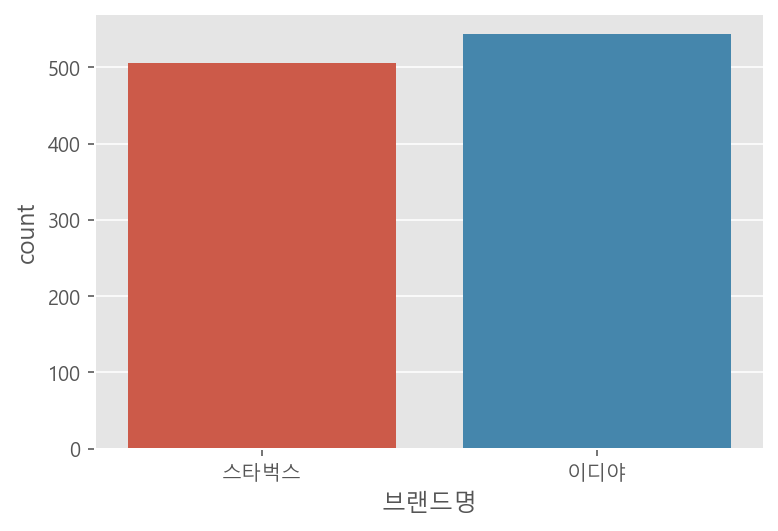

In [16]:
sns.countplot(data=df_cafe, x="브랜드명")

[Text(0, 0, '용산구'),
 Text(0, 0, '영등포구'),
 Text(0, 0, '종로구'),
 Text(0, 0, '서초구'),
 Text(0, 0, '구로구'),
 Text(0, 0, '노원구'),
 Text(0, 0, '마포구'),
 Text(0, 0, '성동구'),
 Text(0, 0, '강남구'),
 Text(0, 0, '동대문구'),
 Text(0, 0, '관악구'),
 Text(0, 0, '강동구'),
 Text(0, 0, '서대문구'),
 Text(0, 0, '강서구'),
 Text(0, 0, '중구'),
 Text(0, 0, '성북구'),
 Text(0, 0, '송파구'),
 Text(0, 0, '금천구'),
 Text(0, 0, '동작구'),
 Text(0, 0, '도봉구'),
 Text(0, 0, '은평구'),
 Text(0, 0, '광진구'),
 Text(0, 0, '강북구'),
 Text(0, 0, '중랑구'),
 Text(0, 0, '양천구')]

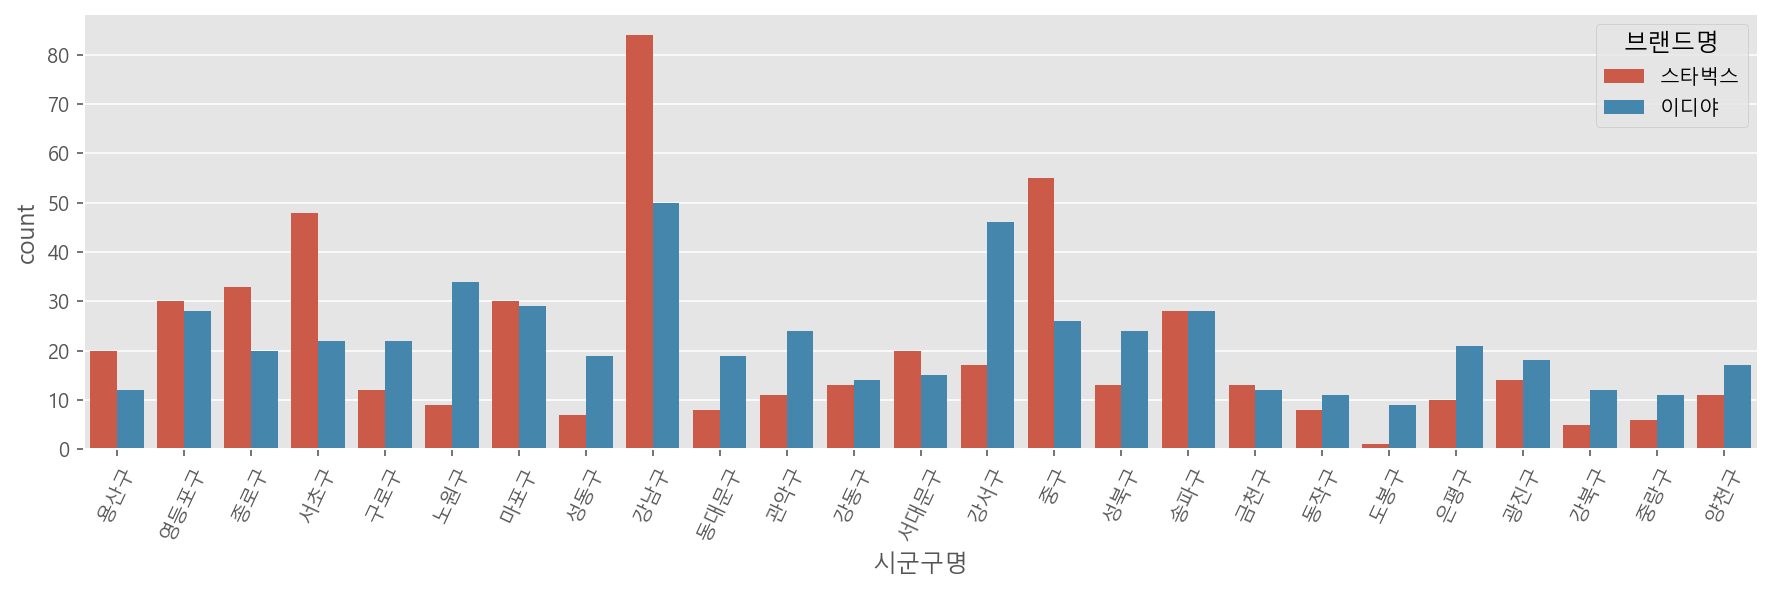

In [17]:
plt.figure(figsize=(15,4))
chart = sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

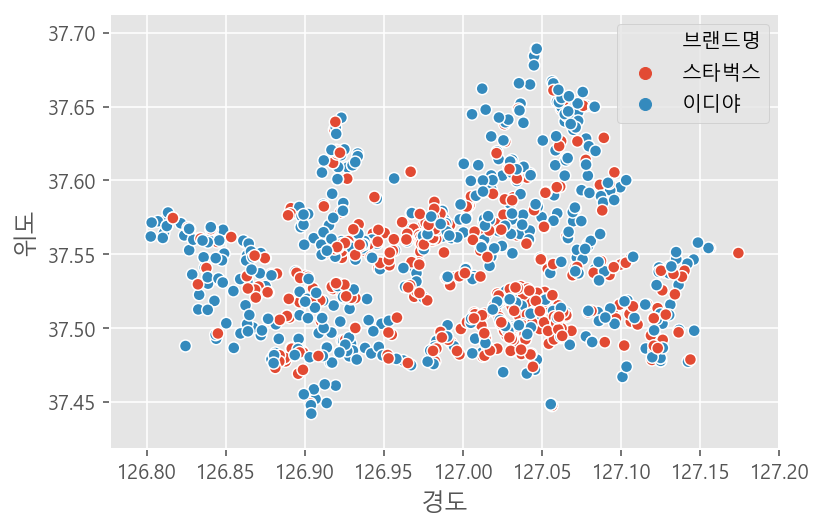

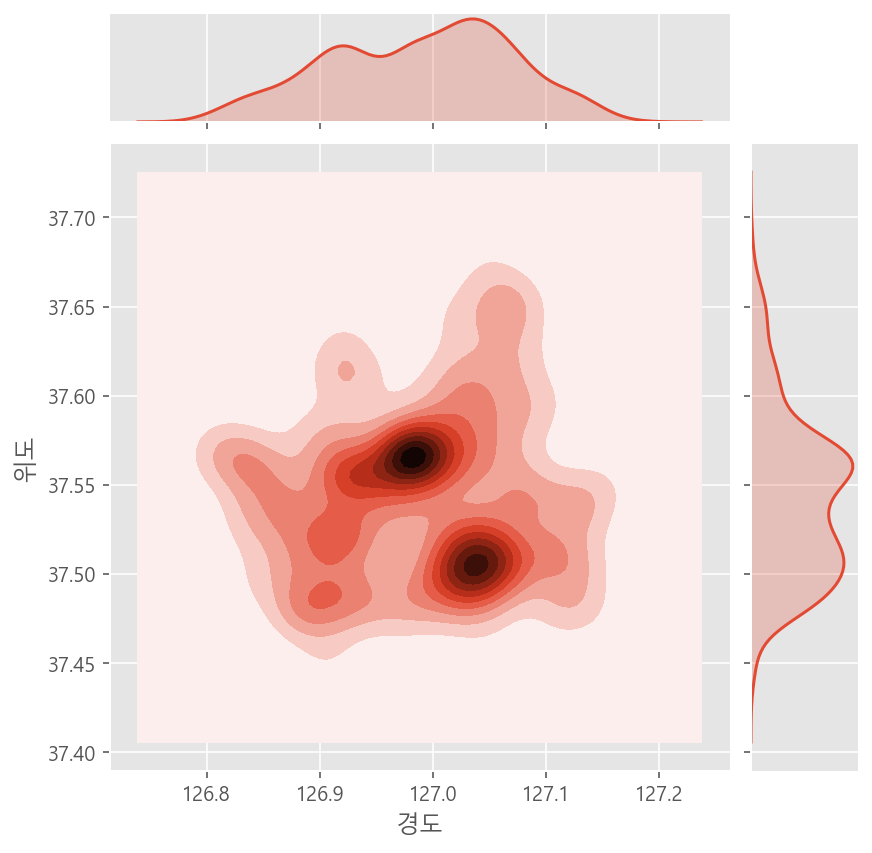

In [18]:
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

In [19]:
df_seoul_star = df_seoul[df_seoul['상호명'] == '스타벅스'].copy()
df_seoul_ediya = df_seoul[df_seoul['상호명'] == '이디야커피'].copy()

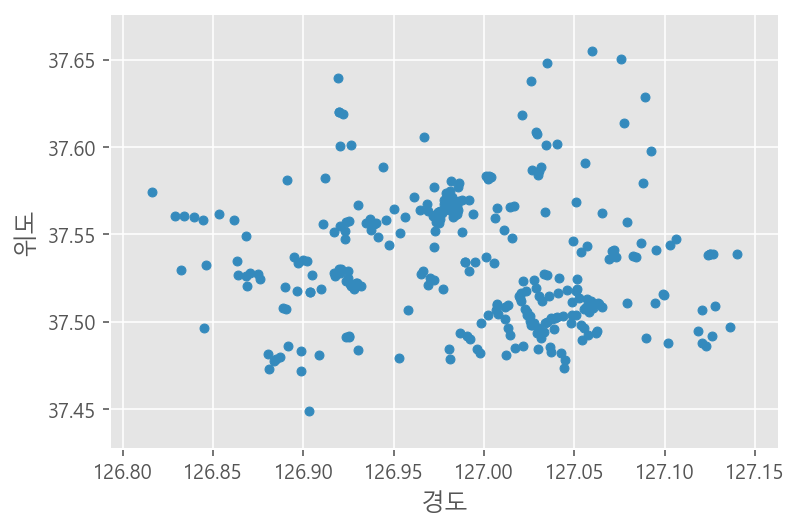

In [20]:
df_seoul_star[['위도','경도']].plot.scatter(x='경도', y='위도')

## 지도에 출력
* 중앙 좌표를 알아보자

In [21]:
import folium

In [22]:
lat = df_cafe['위도'].mean()
long = df_cafe['경도'].mean()

In [23]:
lat, long

(37.542900758808365, 126.98843376360092)

In [24]:
#'Stamen Toner' 'Stamen Terrain': 기본으로 제공하는 타일
#팝업 글씨 클릭시 설명
#tooltip = 'Click me!'
# folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
# folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m) 
# location=[lat,long] 중앙좌표

m = folium.Map(location=[lat,long], zoom_start = 12,tiles='Stamen Toner') 

In [25]:
m

In [26]:
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, '위도'] #df_cafe.loc[i, ['경도','위도']] 둘다잡아옴
    sub_long = df_cafe.loc[i, '경도']
    
    title = f"{df_cafe.loc[i,'상호명']}-{df_cafe.loc[i,'도로명주소']}" # 권장하는 파일스트림
    
    color = 'green'
    if df_cafe.loc[i, '브랜드명'] == '이디야':
        color = 'blue'
    
    folium.CircleMarker(location = [sub_lat, sub_long],radius = 3,color=color,tooltip=title).add_to(m)

In [27]:
m 

In [28]:
# 지도 정보 저장
m.save('map.html')

# GeoJSON을 사용해서 서울지역 시각화

In [29]:
geo_path = f'data/part3_seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [30]:
geo_json['features'][0]['properties']['name']

'강동구'

In [31]:
# 지도 지역별로 색입히기

In [32]:
m = folium.Map(location=[lat,long], zoom_start = 12,tiles='Stamen Toner')

In [33]:
df_star = df_cafe[df_cafe['브랜드명'] == '스타벅스'].copy()
df_star_vs = df_star.groupby(['시군구명','브랜드명'])['상호명'].count()
df_star_vs = df_star_vs.reset_index() # df_star_vs.to_frame() 데이터프래임 처럼보이지만 보통 수로나열되는 index를 쓴다
df_star_vs.columns = ['구','브랜드명','매장수']
df_star_vs

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강동구,스타벅스,13
2,강북구,스타벅스,5
3,강서구,스타벅스,17
4,관악구,스타벅스,11
5,광진구,스타벅스,14
6,구로구,스타벅스,12
7,금천구,스타벅스,13
8,노원구,스타벅스,9
9,도봉구,스타벅스,1


In [34]:
df_cafe_vs = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.columns = ['구','브랜드명','매장수']

df_vs = df_cafe_vs.pivot(index='구',columns='브랜드명',values='매장수')
# 오름차순/내림차순 결정
df_vs['매장수비교']= df_vs['스타벅스'] - df_vs['이디야'] > 0
df_vs.head()


브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [35]:
df_vs['매장수비교']= df_vs['매장수비교'].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0


In [36]:
df_vs = df_vs.reset_index()
df_vs

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0
5,광진구,14,18,0.0
6,구로구,12,22,0.0
7,금천구,13,12,1.0
8,노원구,9,34,0.0
9,도봉구,1,9,0.0


In [37]:
geo_json = json.load(open(geo_path, encoding="utf-8"))
folium.Choropleth(
    geo_data = geo_json,
    name='스타벅스 이디아',
    data = df_vs,
    columns=['구','매장수비교'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity =0.7,
    line_opacity=0.2,
    legend_name='스타벅스와이디아매장비교'
).add_to(m)

In [38]:
m

In [39]:
m.save('save.html')

In [40]:
# 피봇 열값을기준으로 재구성 유니크하다 값이 다 다르다
# 데이터여러개 지원x 합계같은것 x
# 피봇테이블 데ㅣ터여러개가능
# 특정컬럼으로 데이터재구성? -> 피봇 어떤기준의 컬럼 뒤에 어떤데이터?
# 인덱스는 중복이안됨, 중복없는 컬럼을 잡아야함 ->피봇테이블을써야함 데이터안쪽을 합계같은것을 내고싶을때

df_gu_mean = df_cafe.pivot_table(index = '시군구명' , values = ['경도','위도'] , aggfunc = 'mean')
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054
5,광진구,127.083297,37.543770
6,구로구,126.877780,37.494472
7,금천구,126.891712,37.469561
8,노원구,127.067171,37.642393
9,도봉구,127.040474,37.665765


In [41]:
# df_gu_mean + df_vs =>합쳐야 됨
# how = 'inner' 키가 같으면 합쳐라 (순서상관없음 키가 같은 것끼리 합쳐라? 이게 더 맞는 듯)
df_vs = df_vs.merge(df_gu_mean,how='inner',left_on='구',right_on='시군구명')
df_vs

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054
5,광진구,14,18,0.0,광진구,127.083297,37.543770
6,구로구,12,22,0.0,구로구,126.877780,37.494472
7,금천구,13,12,1.0,금천구,126.891712,37.469561
8,노원구,9,34,0.0,노원구,127.067171,37.642393
9,도봉구,1,9,0.0,도봉구,127.040474,37.665765


In [42]:
for i in df_vs.index:
    sub_long = df_vs.loc[i,'경도']
    sub_lat = df_vs.loc[i,'위도']
    
    cafes = ['스타벅스','이디야']
    for cafe in cafes:
        cafe_count = df_vs.loc[i,cafe]
        radius = np.sqrt(cafe_count) * 3
        
        if cafe=='이디야':
            color = 'blue'
            sub_long = sub_long + 0.01
        else:
            color='green'
            
        folium.CircleMarker(location=[sub_lat,sub_long],
                            radius = radius,
                            color=color,
                            fill=True).add_to(m)

In [43]:
m

In [44]:
m.save('cafes.html')